In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

### 📊 Column Description & AQI Relevance (US EPA Standard)

| Column Name   | Description                   | Unit / Scale    | AQI Standard Applied? | Notes                                                              |
|---------------|-------------------------------|------------------|------------------------|---------------------------------------------------------------------|
| Date          | Timestamp of measurement       | UTC datetime     | ❌                     | All dates are in UTC format                                         |
| dew           | Dew point temperature          | °C               | ❌                     | Weather-related feature                                             |
| humidity      | Relative humidity              | %                | ❌                     | Weather-related feature                                             |
| pm1           | Particulate Matter (PM1)       | µg/m³ or AQI     | ⚠️ (Usually Raw)       | Not part of standard EPA AQI, but useful for local pollution study |
| pm10          | Particulate Matter (PM10)      | AQI (0–500)      | ✅                     | AQI value following EPA scale                                       |
| pm25          | Particulate Matter (PM2.5)     | AQI (0–500)      | ✅                     | AQI value following EPA scale                                       |
| pressure      | Atmospheric pressure           | hPa or mbar      | ❌                     | Weather-related feature                                             |
| temperature   | Ambient temperature            | °C               | ❌                     | Weather-related feature                                             |
| wind-speed    | Wind speed                     | m/s or km/h      | ❌                     | Weather-related feature                                             |
| aqi_value     | Overall AQI                    | AQI (0–500)      | ✅                     | Max AQI of available pollutants for that row                        |
| aqi_category  | AQI category name              | Categorical      | ✅                     | Category based on `aqi_value` (e.g., Good, Moderate, Unhealthy)    |


In [2]:
# loading the data files

merged_df = pd.read_csv('../data/merged_dataset/ktm_merged.csv')

merged_df['Date'] = pd.to_datetime(merged_df['Date']).dt.date

In [3]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2237 non-null   object 
 1   dew           2041 non-null   float64
 2   humidity      2134 non-null   float64
 3   pm1           1446 non-null   float64
 4   pm10          1666 non-null   float64
 5   pm25          2153 non-null   float64
 6   pressure      2134 non-null   float64
 7   temperature   2134 non-null   float64
 8   wind-speed    2060 non-null   float64
 9   aqi_value     2153 non-null   float64
 10  aqi_category  2237 non-null   object 
dtypes: float64(9), object(2)
memory usage: 192.4+ KB


In [4]:
merged_df.shape, merged_df.isna().sum() * 100 / merged_df.shape[0]

((2237, 11),
 Date             0.000000
 dew              8.761734
 humidity         4.604381
 pm1             35.359857
 pm10            25.525257
 pm25             3.755029
 pressure         4.604381
 temperature      4.604381
 wind-speed       7.912383
 aqi_value        3.755029
 aqi_category     0.000000
 dtype: float64)

In [5]:
year_2019 = pd.read_csv('../data/year_2019/Kathmandu_2019.csv')
year_2020 = pd.read_csv('../data/year_2020/Kathmandu_2020.csv')
year_2021 = pd.read_csv('../data/year_2021/Kathmandu_2021.csv')
year_2022 = pd.read_csv('../data/year_2022/Kathmandu_2022.csv')
year_2023 = pd.read_csv('../data/year_2023/Kathmandu_2023.csv')
year_2024 = pd.read_csv('../data/year_2024_2025/Kathmandu_2024_2025.csv')

In [6]:
merged_df.describe(include=['number'])

,dew,humidity,pm1,pm10,pm25,pressure,temperature,wind-speed,aqi_value
count,2041.000000,2134.000000,1446.000000,1666.000000,2153.000000,2134.000000,2134.000000,2060.000000,2153.000000
mean,13.317736,77.813824,91.152144,46.680072,105.776126,1015.751968,17.673336,1.220825,105.776126
std,6.449681,13.588919,44.140673,27.718171,48.506688,4.281854,5.330664,0.402503,48.506688
min,-1.000000,21.600000,12.000000,1.000000,17.000000,1003.500000,2.500000,0.400000,17.000000
25%,7.500000,71.775000,56.000000,22.000000,61.000000,1012.500000,13.000000,1.000000,61.000000
50%,13.000000,80.500000,84.000000,45.000000,102.000000,1016.000000,18.850000,1.200000,102.000000
75%,20.000000,87.000000,129.000000,64.000000,154.000000,1019.000000,22.500000,1.500000,154.000000
max,23.000000,100.000000,221.000000,174.000000,346.000000,1025.000000,27.100000,4.100000,346.000000


In [7]:
df = merged_df.set_index('Date')

df.head()

,dew,humidity,pm1,pm10,pm25,pressure,temperature,wind-speed,aqi_value,aqi_category
Date,,,,,,,,,,
2018-12-31,2.5,70.0,NaN,NaN,183.0,1023.0,8.0,1.5,183.0,Unhealthy
2019-01-01,2.0,70.0,NaN,NaN,181.0,1023.0,8.0,1.5,181.0,Unhealthy
2019-01-02,2.5,70.0,NaN,NaN,174.0,1023.0,7.5,1.5,174.0,Unhealthy
2019-01-03,2.5,66.0,NaN,NaN,163.0,1022.0,8.0,1.8,163.0,Unhealthy
2019-01-04,2.0,72.5,NaN,NaN,163.0,1022.5,6.5,1.5,163.0,Unhealthy


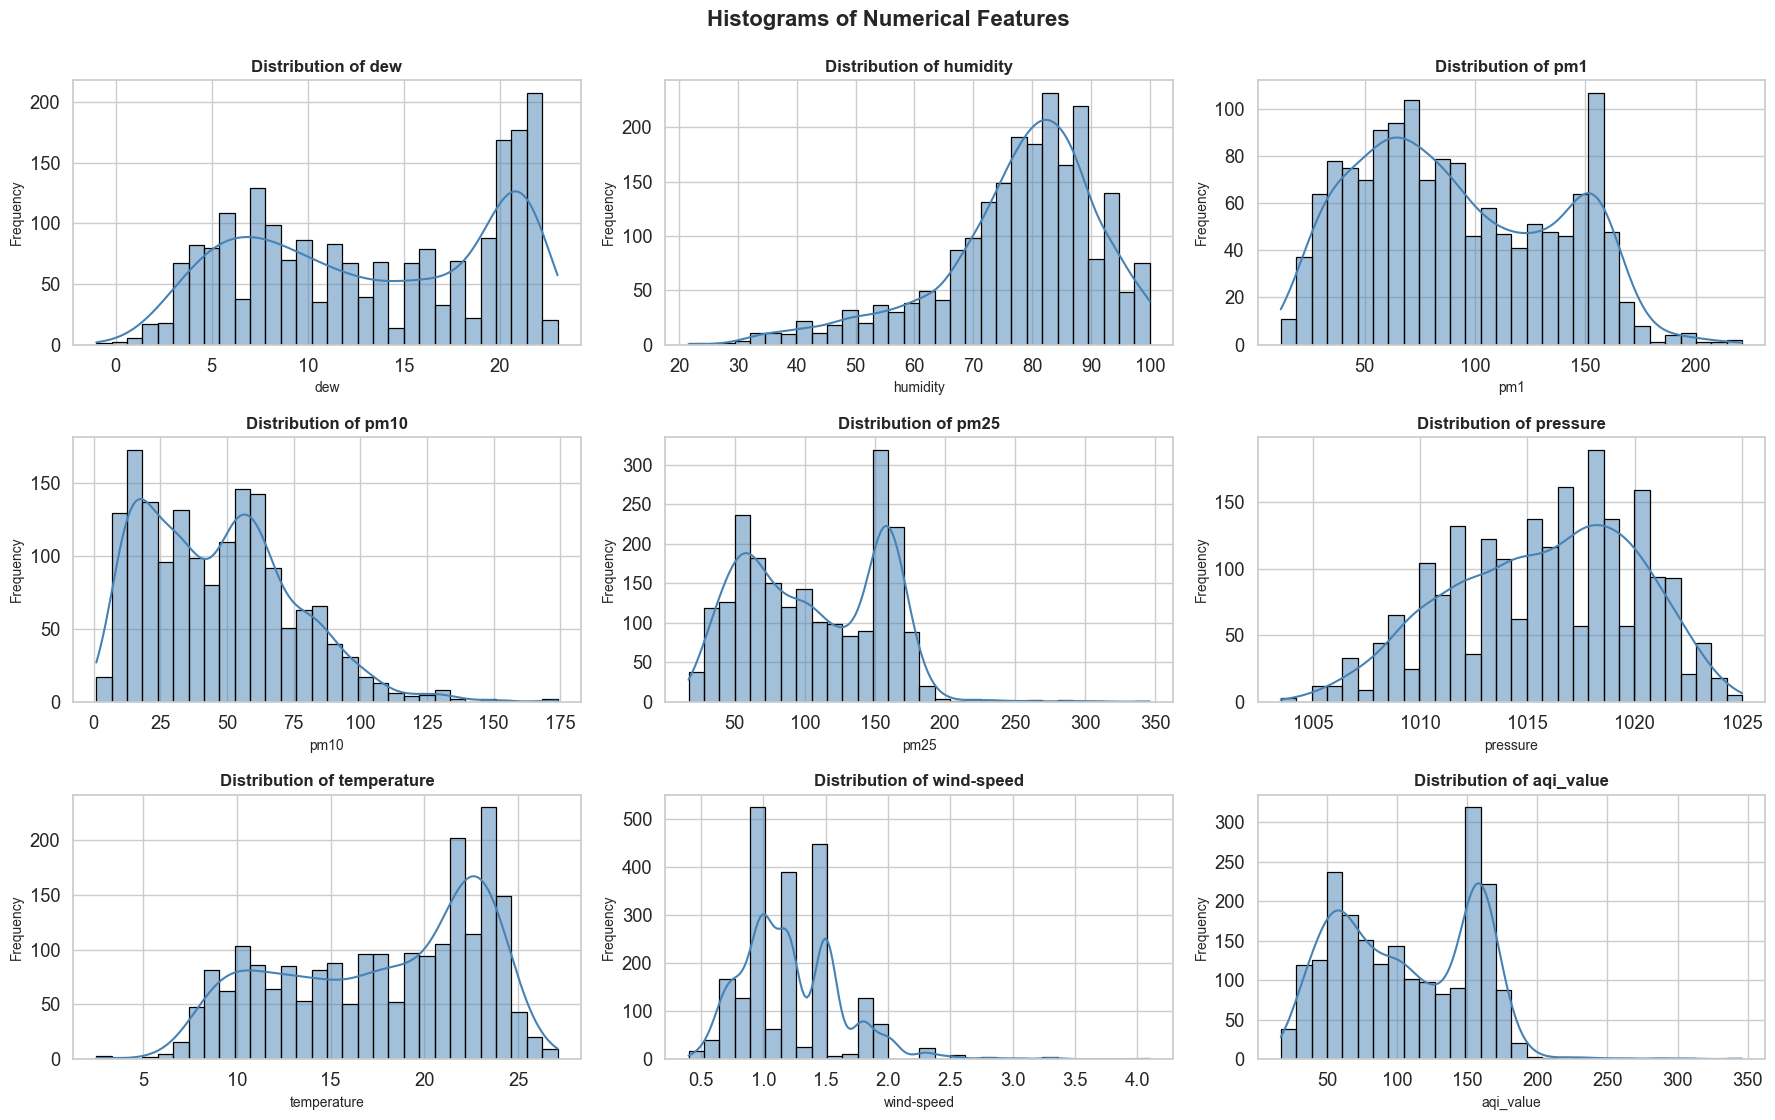

In [8]:

# Set a professional style
sns.set(style="whitegrid", palette="muted", color_codes=True)
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Select numerical columns
numerical_cols = merged_df.select_dtypes(include=np.number).columns

# Create subplots with custom size and layout
fig, axes = plt.subplots(nrows=len(numerical_cols) // 3 + 1, ncols=3, figsize=(18, 14))
axes = axes.flatten()  # Flatten to iterate easily

# Plot histograms
for i, col in enumerate(numerical_cols):
    sns.histplot(merged_df[col], bins=30, kde=True, ax=axes[i], color="steelblue", edgecolor='black')
    axes[i].set_title(f"Distribution of {col}", fontsize=12, weight='bold')
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel("Frequency", fontsize=10)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and spacing
plt.tight_layout()
plt.suptitle("Histograms of Numerical Features", fontsize=16, weight='bold', y=1.02)
plt.show()


In [9]:
def scatter_plot_custom(data, x_col, y_col, color_col=None, hover_col=None, title=None):
    """
    Creates a customizable scatter plot using Plotly.

    Parameters:
    - data (pd.DataFrame): The dataframe containing the data to be plotted.
    - x_col (str): The column name for the x-axis.
    - y_col (str): The column name for the y-axis.
    - color_col (str, optional): The column name for color encoding. Default is None.
    - hover_col (str, optional): The column name for hover information. Default is None.
    - title (str, optional): The title of the plot. If not provided, a default title is generated.

    Returns:
    - None: Displays the scatter plot.
    """
    fig = px.scatter(
        data,
        x=x_col,
        y=y_col,
        color=color_col,  # Optional color column
        hover_name=hover_col,  # Optional hover column
        color_continuous_scale='OrRd',
        labels={
            x_col: x_col.replace('_', ' ').title(),
            y_col: y_col.replace('_', ' ').title(),
            color_col: color_col.replace('_', ' ').title() if color_col else None
        },
        title=title or f'{y_col.replace("_", " ").title()} vs {x_col.replace("_", " ").title()}',
        template='plotly_white'
    )

    fig.update_traces(marker=dict(line=dict(width=1, color='black'), opacity=0.7))
    fig.update_layout(
        legend_title=color_col.replace('_', ' ').title() if color_col else None,
        showlegend=True  # Ensure the legend is displayed
    )

    fig.show()


In [10]:
df.columns

Index(['dew', 'humidity', 'pm1', 'pm10', 'pm25', 'pressure', 'temperature',
       'wind-speed', 'aqi_value', 'aqi_category'],
      dtype='object')

In [11]:
scatter_plot_custom(merged_df, 'humidity', 'aqi_value', hover_col='Date', title='AQI Value vs Humidity')

In [12]:
scatter_plot_custom(merged_df, 'pm25', 'pm10', color_col='aqi_value',hover_col='Date', title='pm2.5 vs pm10 with AQI as Color')


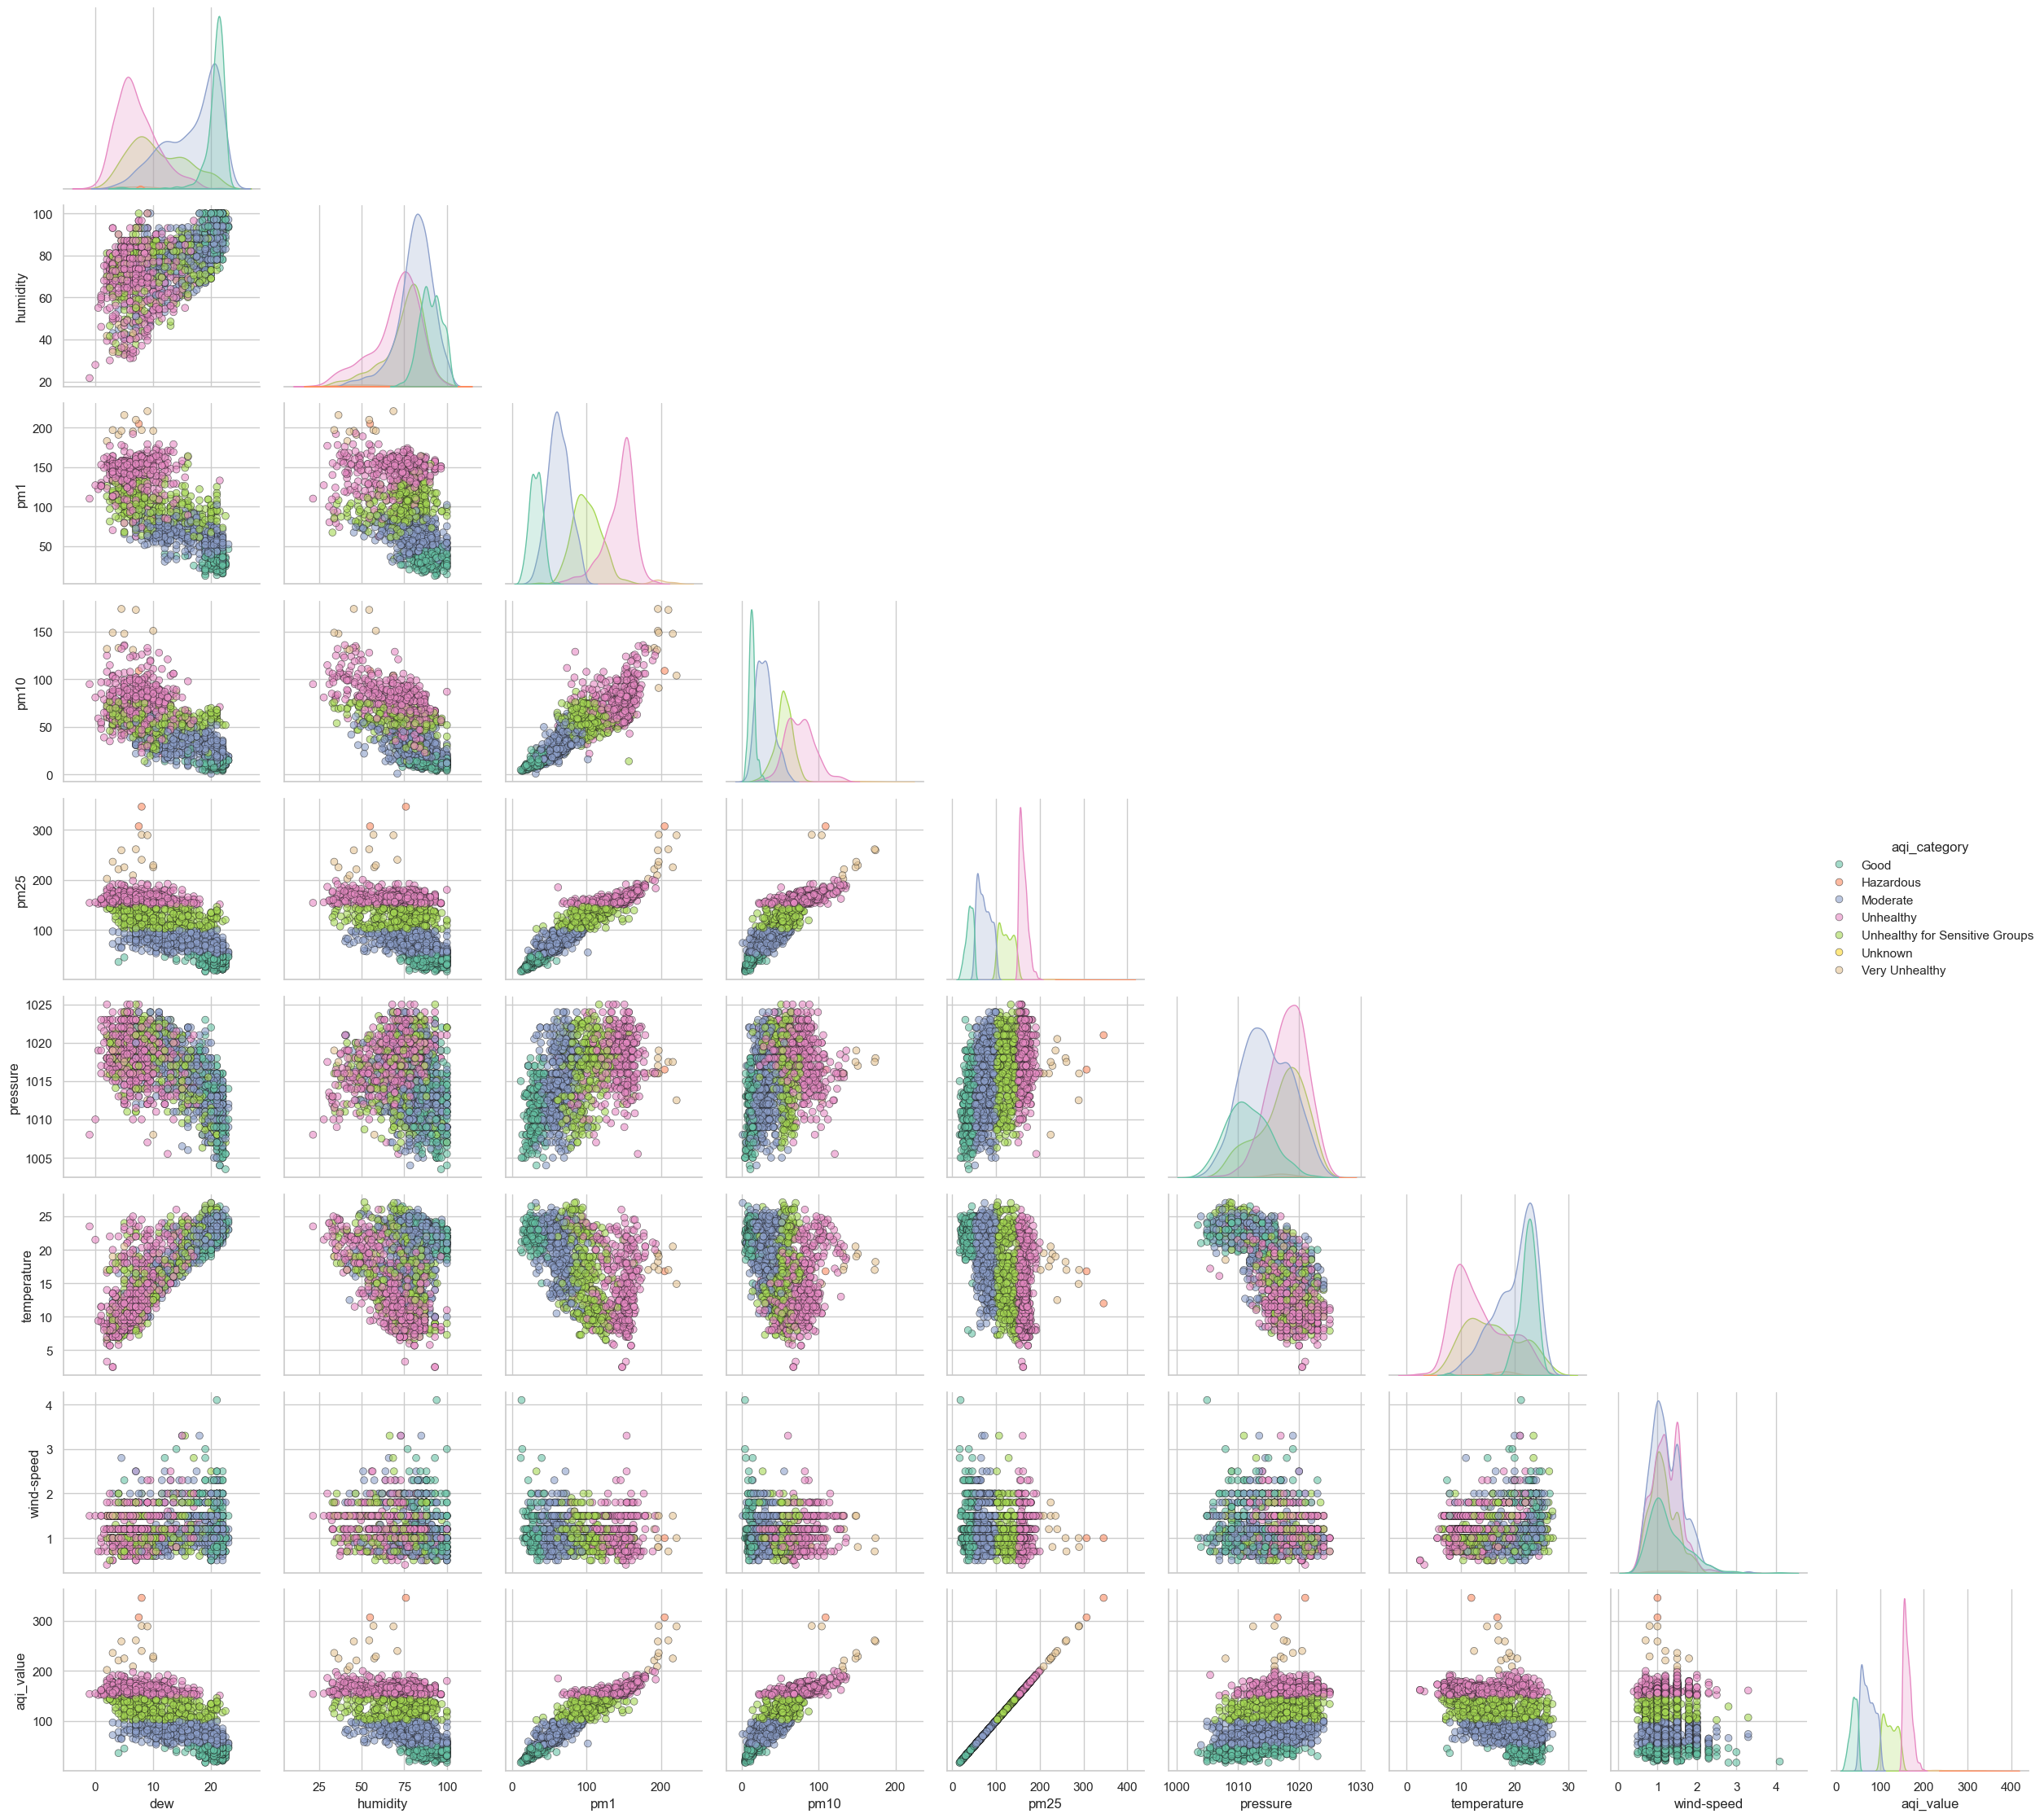

In [26]:
# Drop non-numeric or datetime columns
df_clean = merged_df.drop(columns=['Date'], errors='ignore')  # 'Date' is datetime, so we exclude it

# Optional: Ensure categorical column is of type 'category'
df_clean['aqi_category'] = df_clean['aqi_category'].astype('category')

# Set the Seaborn style for a professional look
sns.set(style="whitegrid", palette="muted", color_codes=True)

# Create the pair plot
pair_plot = sns.pairplot(df_clean,
                         hue='aqi_category',      # Color by air quality category
                         palette='Set2',          # Soft professional color palette
                         diag_kind='kde',         # KDE plots on the diagonal
                         corner=True,             # Lower triangle only
                         plot_kws={
                             'alpha': 0.6,         # Transparency for scatter points
                             's': 40,              # Marker size
                             'edgecolor': 'k'      # Black edge for clarity
                         })

# Improve layout
plt.tight_layout()

# Optional: Save the plot
pair_plot.savefig("../results/pair_plot_and_heatmap/professional_pairplot.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


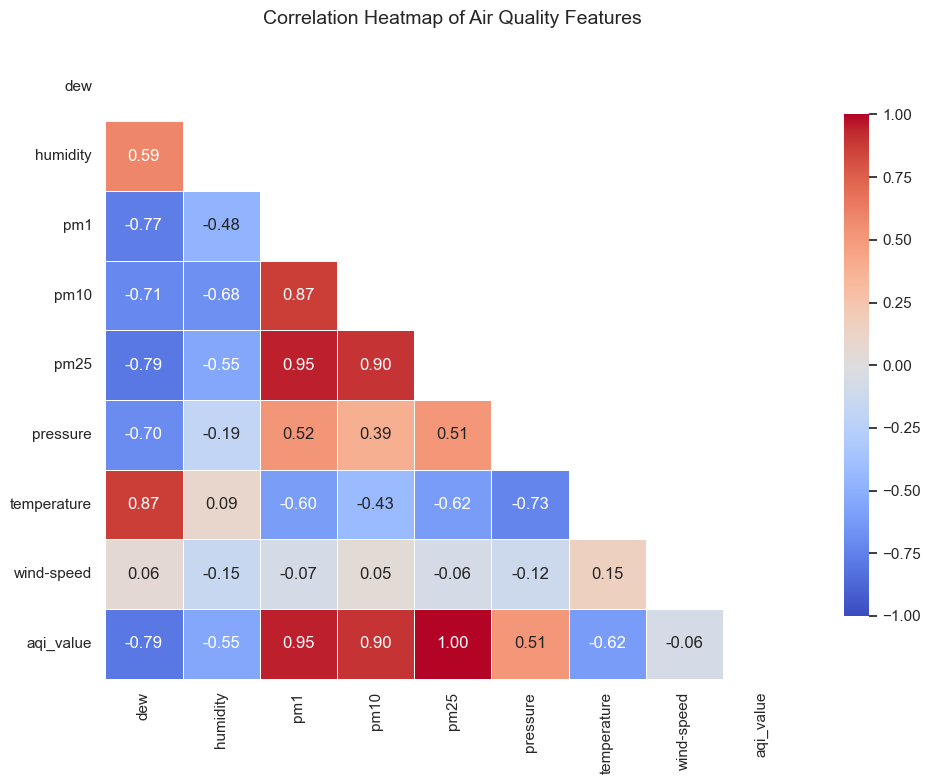

In [27]:
# Compute the correlation matrix
corr_matrix = df_clean.select_dtypes(include="number").corr()

# Set the aesthetic style
sns.set(style="white", context="notebook")

# Create a figure with desired size
plt.figure(figsize=(10, 8))

# Generate a mask for the upper triangle (optional, for cleaner look)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create the heatmap
heatmap = sns.heatmap(corr_matrix,
                      mask=mask,
                      annot=True,              # Show correlation coefficients
                      fmt=".2f",               # Format to 2 decimal places
                      cmap='coolwarm',         # Professional color palette
                      vmin=-1, vmax=1,         # Standard range for correlations
                      linewidths=0.5,          # Line between boxes
                      linecolor='white',
                      cbar_kws={"shrink": .8}, # Color bar size
                      )

# Add title
plt.title('Correlation Heatmap of Air Quality Features', fontsize=14, pad=20)

# Improve layout
plt.tight_layout()

# Optional: Save the figure
plt.savefig("../results/pair_plot_and_heatmap/correlation_heatmap.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [18]:


# Define bin edges (make sure it covers all possible wind-speed values)
bin_edges = [0, 1, 2, 3, 4, 6, 10, float('inf')]
bin_labels = ['0-1', '1-2', '2-3', '3-4', '4-6', '6-10', '10+']

# Create wind_bin column using pd.cut
merged_df['wind_bin'] = pd.cut(merged_df['wind-speed'], bins=bin_edges, labels=bin_labels, right=False)



In [22]:
import matplotlib.patches as mpatches
def plot_violin_with_overlays(data, y_col, title=None, save_path=None):
    """
    Creates a violin plot with strip plot and point plot overlays for 'wind_bin' vs a given y_col.
    Assumes pollutant values follow US EPA measurement standards.

    Parameters:
    - data (pd.DataFrame): The dataframe containing the data to be plotted.
    - y_col (str): The column name for the y-axis.
    - title (str, optional): The title of the plot. Default is None.
    - save_path (str, optional): Path to save the image. If None, the image is not saved.

    Returns:
    - None: Displays the plot.
    """

    # Set Seaborn style
    sns.set(style="whitegrid", context="notebook")

    # Define the order of wind bins to ensure consistent alignment
    bin_order = ['0-1', '1-2', '2-3', '3-4', '4-6', '6-10', '10+']

    # Create the plot
    plt.figure(figsize=(12, 7))

    # Violin plot (distribution)
    sns.violinplot(
        x='wind_bin', y=y_col, data=data,
        order=bin_order, inner=None, linewidth=1.2, palette="Pastel2"
    )

    # Overlay strip plot (raw points)
    sns.stripplot(
        x='wind_bin', y=y_col, data=data,
        order=bin_order, size=3, color='k', alpha=0.3, jitter=True
    )

    # Overlay point plot (mean)
    # sns.pointplot(
    #     x='wind_bin', y=y_col, data=data,
    #     order=bin_order, color='darkblue', markers='d',
    #     estimator='mean', errorbar=None
    # )

    # Add title and labels
    plt.title(title or f'{y_col.replace("_", " ").title()} vs Wind Speed Bins', fontsize=14, weight='bold')
    plt.xlabel('Wind Speed Bins (m/s)', fontsize=12)
    plt.ylabel(y_col.replace("_", " ").title(), fontsize=12)

    # Add annotation for EPA standards
    if y_col.lower() in ['pm1', 'pm10', 'pm25']:
        plt.figtext(0.5, -0.05,
                    f"Note: {y_col.upper()} values are in accordance with U.S. EPA air quality standards.",
                    wrap=True, horizontalalignment='center', fontsize=10, style='italic')

    # Add custom legend
    legend_patches = [
        mpatches.Patch(color='lightblue', label='Distribution (Violin)'),
        mpatches.Patch(color='k', label='Raw Data Points (Strip)', alpha=0.3),
        # mpatches.Patch(color='darkblue', label='Mean Value (Point Plot)')
    ]
    plt.legend(handles=legend_patches, loc='upper right', frameon=True)

    plt.grid(True)
    plt.tight_layout()
    
    # Save the figure if save_path is provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()


In [20]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

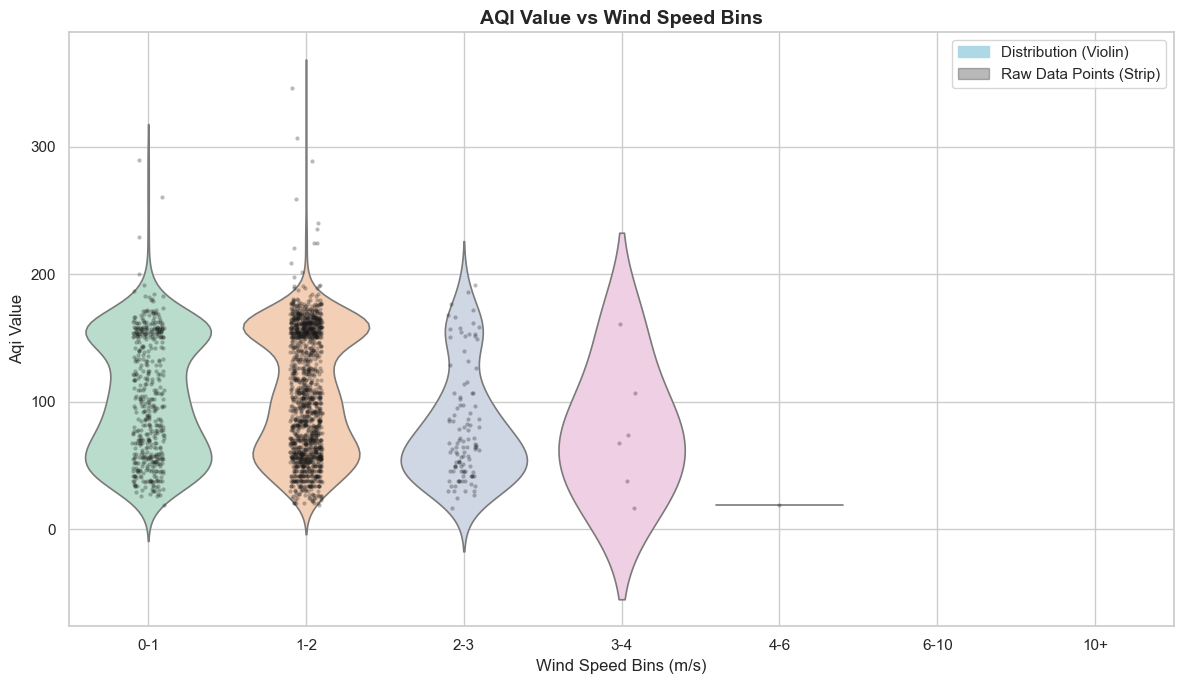

In [25]:
# voili plot for all x = wind_bin and y for all pollutants

# plot_violin_with_overlays(merged_df, 'pm25', title='PM2.5 vs Wind Speed Bins', save_path='../results/volin_plot/pm25_vs_wind_bin.png')
# plot_violin_with_overlays(merged_df, 'pm10', title='PM10 vs Wind Speed Bins', save_path='../results/volin_plot/pm10_vs_wind_bin.png')
# plot_violin_with_overlays(merged_df, 'pm1', title='pm1 vs Wind Speed Bins', save_path='../results/volin_plot/pm1_vs_wind_bin.png')
# plot_violin_with_overlays(merged_df, 'humidity', title='Humidity vs Wind Speed Bins', save_path='../results/volin_plot/humidity_vs_wind_bin.png')

# aqi_value vs wind_bin
plot_violin_with_overlays(merged_df, 'aqi_value', title='AQI Value vs Wind Speed Bins', save_path='../results/volin_plot/aqi_value_vs_wind_bin.png')